In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
pd.set_option('display.max_colwidth', None)
df0 = pd.read_csv('data-dictionary.csv')
df0

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [73]:
df = pd.read_csv('Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [75]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [76]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [77]:
df[df["country"] == "Ukraine"]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
156,Ukraine,11.7,47.1,7.72,51.1,7820,13.4,70.4,1.44,2970


In [78]:
df.nlargest(10, ['life_expec'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
139,Spain,3.8,25.5,9.54,26.8,32500,0.160,81.9,1.37,30700
75,Italy,4.0,25.2,9.53,27.2,36200,0.319,81.7,1.46,35800
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600
74,Israel,4.6,35.0,7.63,32.9,29600,1.770,81.4,3.03,30600


In [79]:
df.nsmallest(10, ['life_expec'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
137,South Africa,53.7,28.6,8.94,27.4,12000,6.35,54.3,2.59,7280
106,Mozambique,101.0,31.5,5.21,46.2,918,7.64,54.5,5.56,419
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.97,55.6,5.05,547
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553


In [80]:
df.nlargest(10, ['gdpp'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
110,Netherlands,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400


In [81]:
df.nsmallest(10, ['gdpp'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482


In [82]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


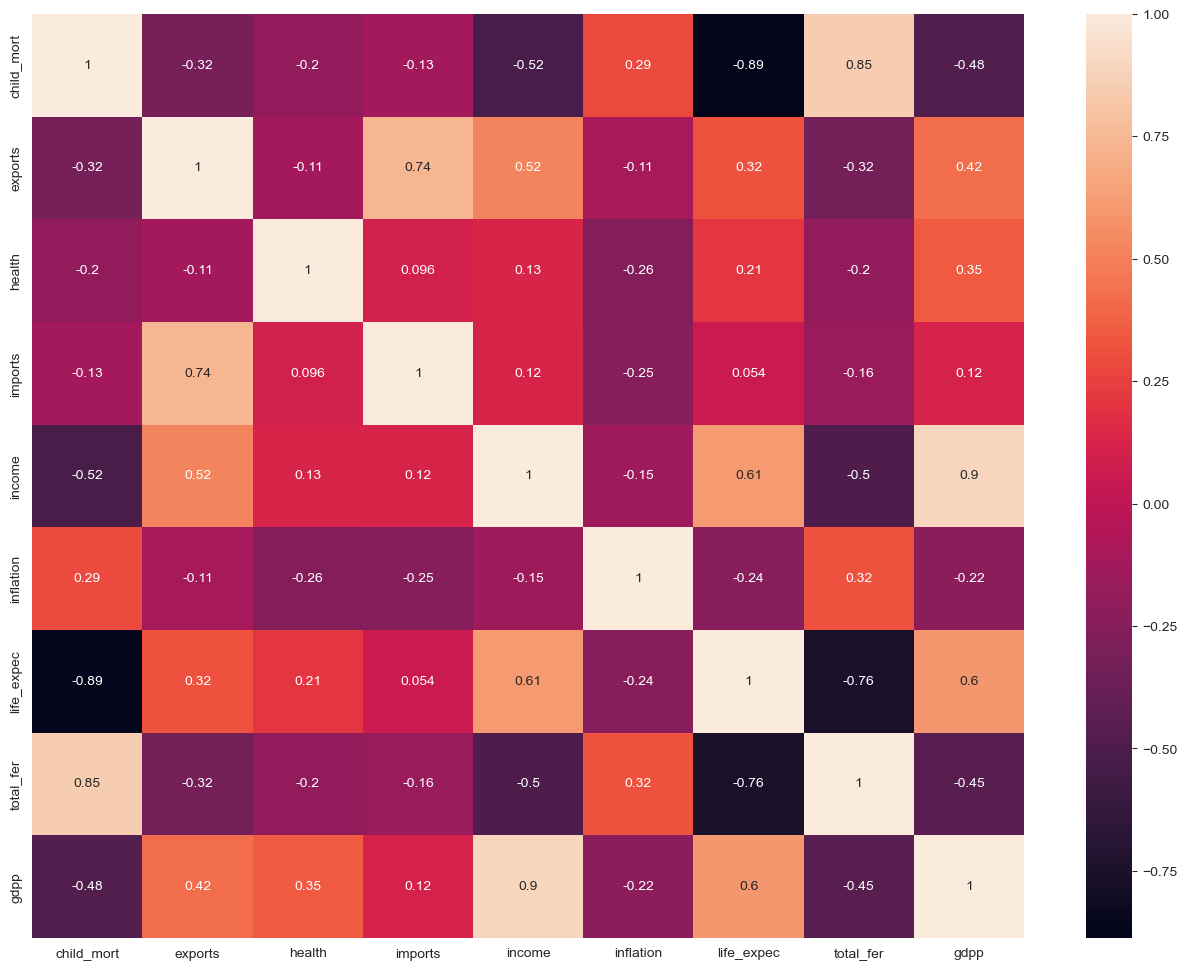

In [83]:

plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [84]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

<AxesSubplot:xlabel='health'>

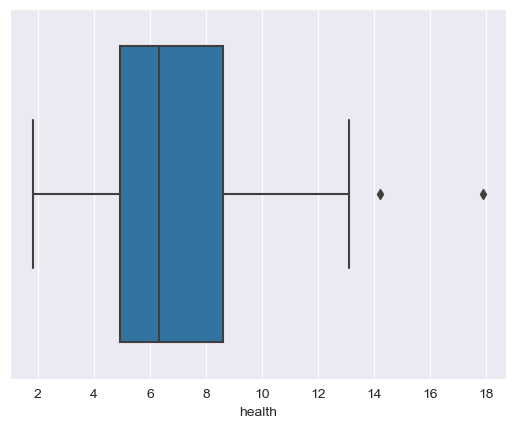

In [85]:
sns.boxplot(x=df['health'])

<AxesSubplot:xlabel='gdpp', ylabel='Count'>

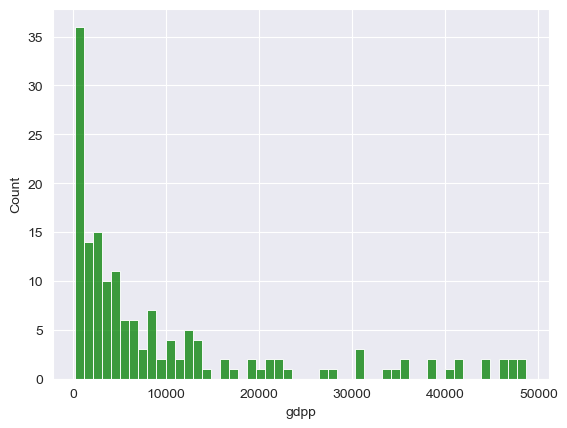

In [86]:
df3 = df[df['gdpp'] < 50000]
sns.histplot(data=df3, x="gdpp", color="green", bins = 50)

<AxesSubplot:xlabel='child_mort', ylabel='total_fer'>

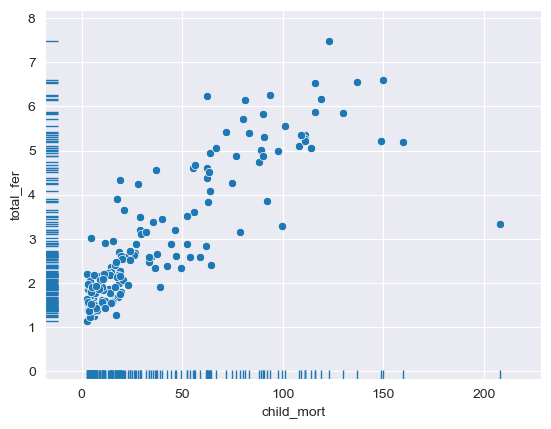

In [87]:
sns.scatterplot(data = df, x = "child_mort", y = "total_fer")
sns.rugplot(data = df, x = "child_mort", y = "total_fer")

<AxesSubplot:xlabel='life_expec', ylabel='gdpp'>

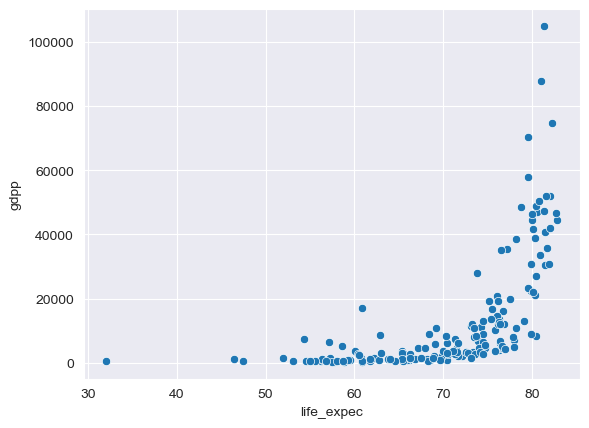

In [88]:
sns.scatterplot(data=df, x="life_expec", y="gdpp")

<AxesSubplot:xlabel='income', ylabel='gdpp'>

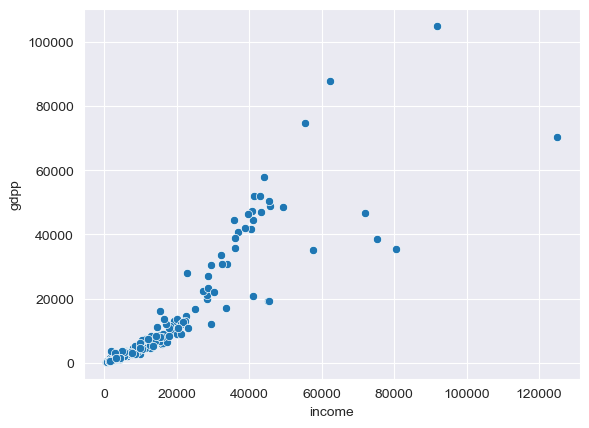

In [89]:
sns.scatterplot(data=df, x="income", y="gdpp")

<AxesSubplot:xlabel='exports', ylabel='imports'>

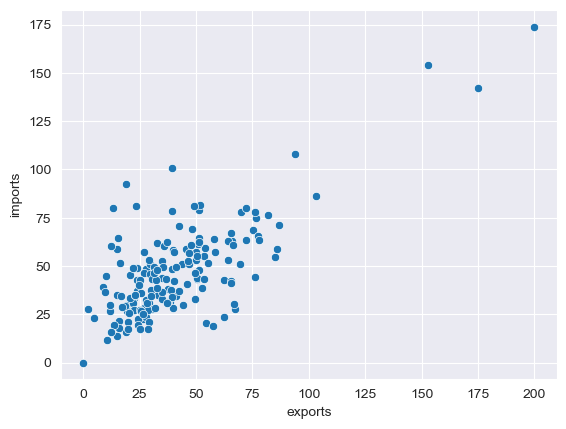

In [90]:
sns.scatterplot(data=df, x="exports", y="imports")

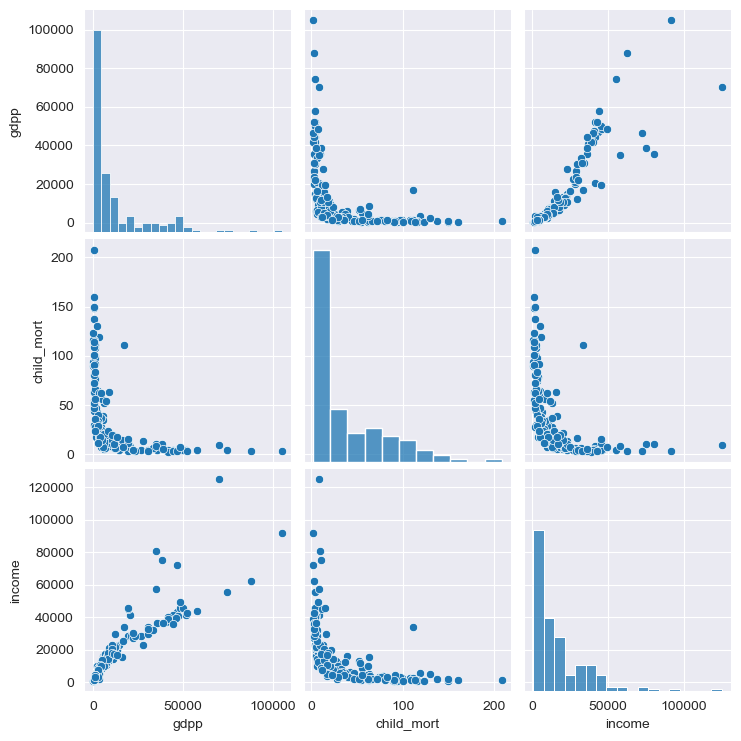

In [91]:
df4 = df[["country", "gdpp", "child_mort", "income"]]
sns.pairplot(df4)

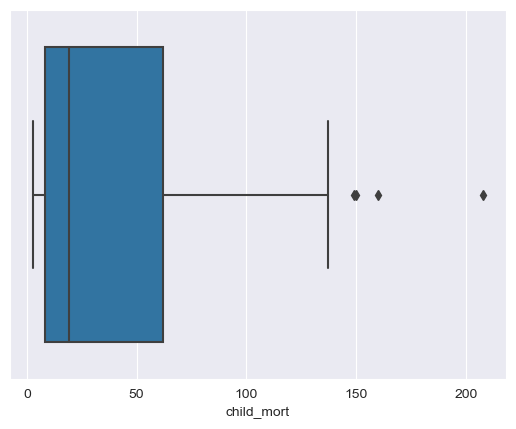

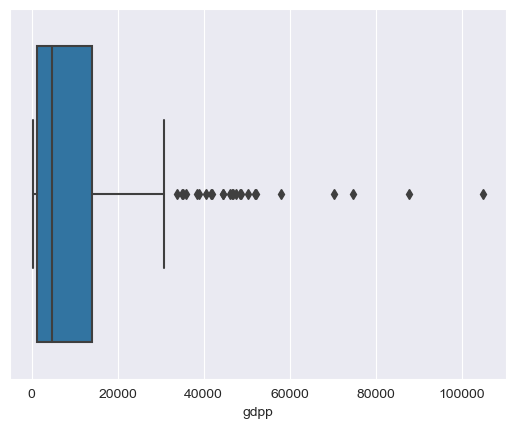

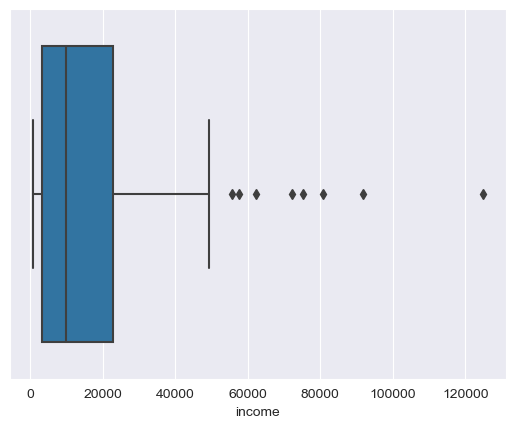

In [92]:
fig = plt.figure()
sns.boxplot(x=df['child_mort'])
plt.show()
sns.boxplot(x=df['gdpp'])
plt.show()
sns.boxplot(x=df['income'])
plt.show()

In [93]:
df4 = df4[df4['gdpp'] < 55000]
df4 = df4[df4['child_mort'] < 140]
df4 = df4[df4['income'] < 50000]
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 166
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     154 non-null    object 
 1   gdpp        154 non-null    int64  
 2   child_mort  154 non-null    float64
 3   income      154 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 6.0+ KB


C:\ProgramData\Miniconda3\envs\pythonProject\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Miniconda3\envs\pythonProject\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Miniconda3\envs\pythonProject\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Miniconda3\envs\pythonProject\lib\site-packages\sklearn\clust

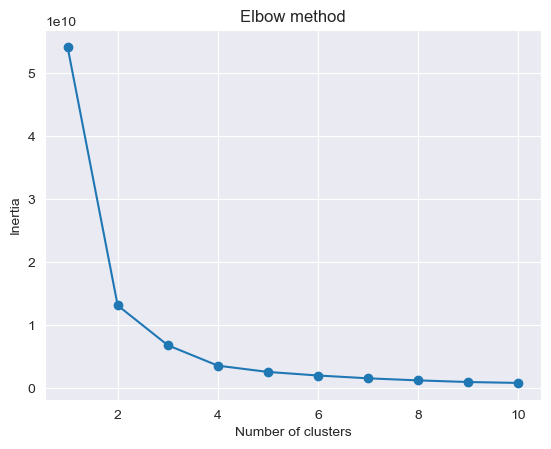

In [94]:
data1 = list(zip(df4["gdpp"], df4["income"]))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data1)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

C:\ProgramData\Miniconda3\envs\pythonProject\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


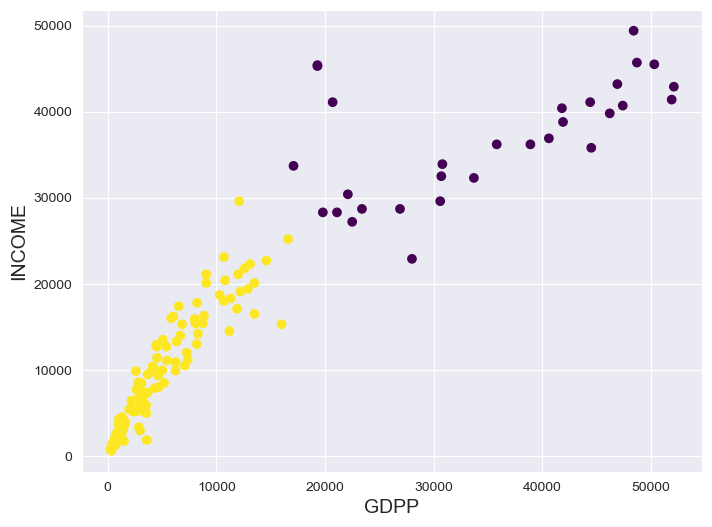

In [95]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data1)
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df4["gdpp"], df4["income"], c=kmeans.labels_, cmap='viridis')
ax.set_xlabel('GDPP', fontsize=14)
ax.set_ylabel('INCOME', fontsize=14)
plt.show()

In [96]:
df4.nsmallest(8, ['income', 'gdpp'])

,country,gdpp,child_mort,income
37,"Congo, Dem. Rep.",334,116.0,609
88,Liberia,327,89.3,700
26,Burundi,231,93.6,764
112,Niger,348,123.0,814
106,Mozambique,419,101.0,918
94,Malawi,459,90.5,1030
63,Guinea,648,109.0,1190
150,Togo,488,90.3,1210


In [97]:
df4.nlargest(8, ['income', 'gdpp'])

,country,gdpp,child_mort,income
159,United States,48400,7.3,49400
73,Ireland,48700,4.2,45700
110,Netherlands,50300,4.5,45500
128,Saudi Arabia,19300,15.7,45400
115,Oman,19300,11.7,45300
8,Austria,46900,4.3,43200
144,Sweden,52100,3.0,42900
7,Australia,51900,4.8,41400


C:\ProgramData\Miniconda3\envs\pythonProject\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Miniconda3\envs\pythonProject\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Miniconda3\envs\pythonProject\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Miniconda3\envs\pythonProject\lib\site-packages\sklearn\clust

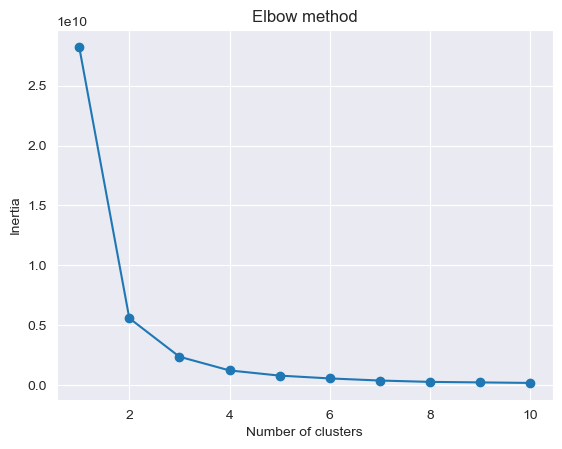

In [98]:
data2 = list(zip(df4["gdpp"], df4["child_mort"]))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data2)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

C:\ProgramData\Miniconda3\envs\pythonProject\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


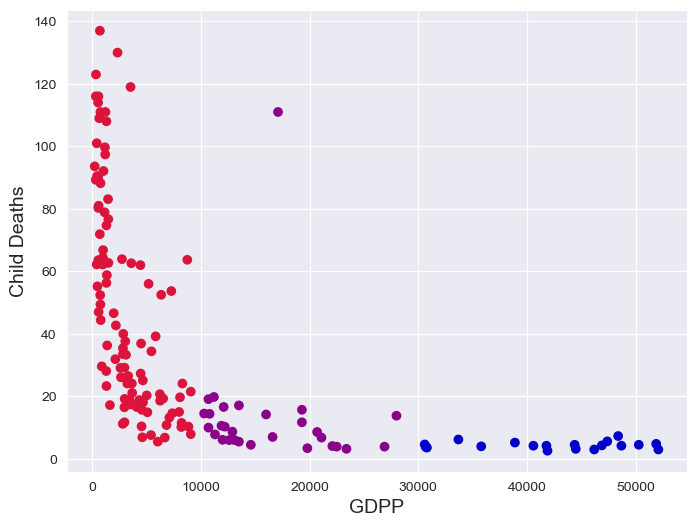

In [99]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data2)
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df4["gdpp"], df4["child_mort"], c=kmeans.labels_, cmap = customcmap)
ax.set_xlabel('GDPP', fontsize=14)
ax.set_ylabel('Child Deaths', fontsize=14)
plt.show()

In [100]:
X = df4[['child_mort', 'income']].copy()
from sklearn.mixture import GaussianMixture
n_clusters = 3
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(X)
cluster_labels = gmm_model.predict(X)
X = pd.DataFrame(X)
X['cluster'] = cluster_labels

C:\ProgramData\Miniconda3\envs\pythonProject\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Income')

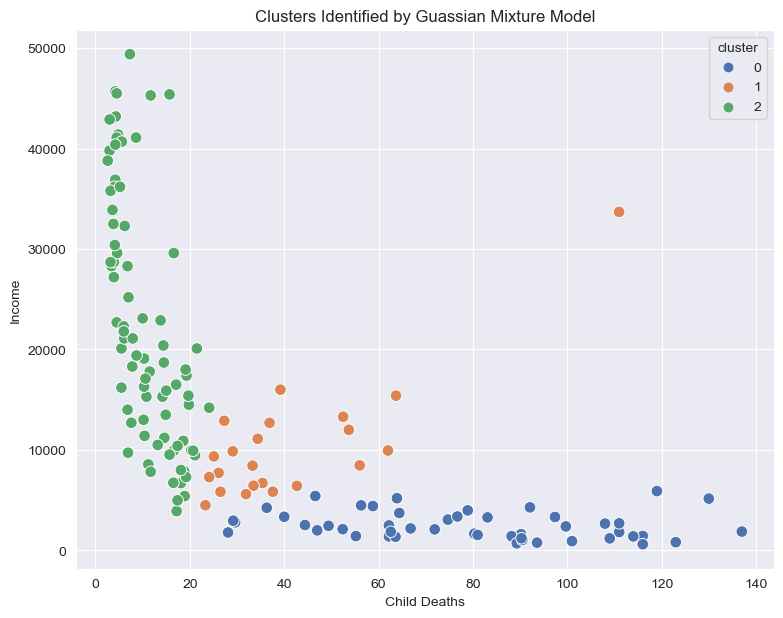

In [101]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.scatterplot(x='child_mort', y='income', data=X, hue='cluster', palette="deep", s=70, ax = ax) 
plt.title('Clusters Identified by Guassian Mixture Model')
plt.xlabel('Child Deaths')
plt.ylabel('Income')

In [102]:
df5 = df4[["country"]]
df5=pd.merge(df5,X, left_index=True,right_index=True)
df5.nsmallest(8, ['income', 'child_mort'])

,country,child_mort,income,cluster
37,"Congo, Dem. Rep.",116.0,609,0
88,Liberia,89.3,700,0
26,Burundi,93.6,764,0
112,Niger,123.0,814,0
106,Mozambique,101.0,918,0
94,Malawi,90.5,1030,0
63,Guinea,109.0,1190,0
150,Togo,90.3,1210,0


In [103]:
df5['cluster'].value_counts(normalize=True)

2    0.532468
0    0.318182
1    0.149351
Name: cluster, dtype: float64

In [104]:
Cluster_child_mort=pd.DataFrame(X.groupby(["cluster"]).child_mort.mean())
Cluster_income=pd.DataFrame(X.groupby(["cluster"]).income.mean())
df6 = pd.concat([Cluster_child_mort,Cluster_income], axis=1)
df6.columns = ["child_mort","income"]
df6

,child_mort,income
cluster,,
0,78.665306,2487.653061
1,40.408696,10296.521739
2,10.778049,22376.951220


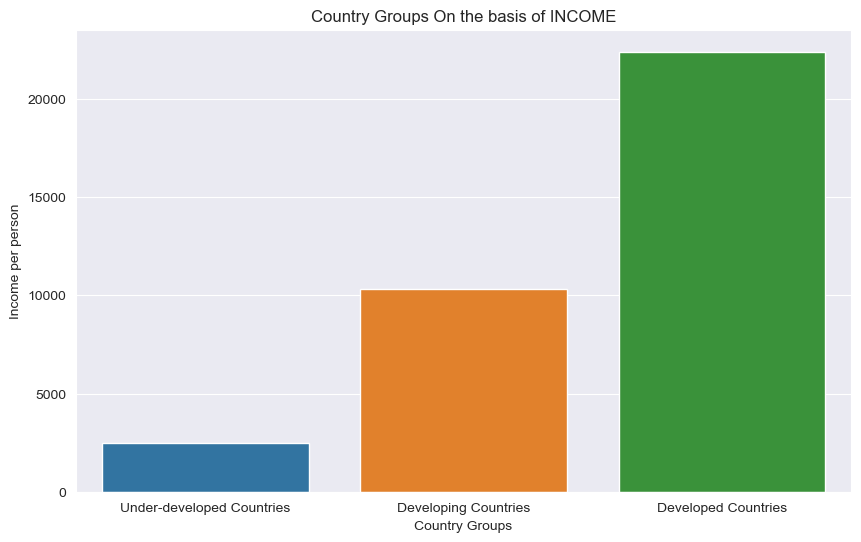

In [105]:
fig = plt.figure(figsize = (10,6))
df6.rename(index={0: 'Under-developed Countries'},inplace=True)
df6.rename(index={1: 'Developing Countries'},inplace=True)
df6.rename(index={2: 'Developed Countries'},inplace=True)
s=sns.barplot(x=df6.index,y='income',data=df6)
plt.xlabel('Country Groups', fontsize=10)
plt.ylabel('Income per person', fontsize=10)
plt.title('Country Groups On the basis of INCOME')
plt.show()

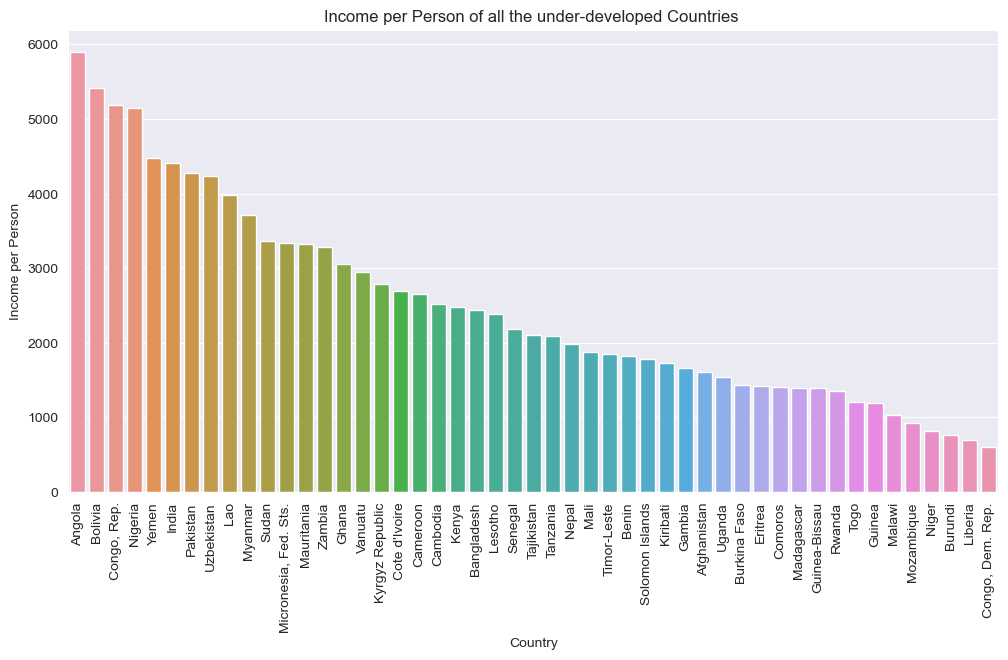

In [106]:
Developed_Con=df5[df5['cluster']==2].sort_values(by='income', ascending=False)
Avg_Con=df5[df5['cluster']==1].sort_values(by='income', ascending=False)
Poor_Con=df5[df5['cluster']==0].sort_values(by='income', ascending=False)

fig = plt.figure(figsize = (12,6))
s=sns.barplot(x='country',y='income',data=Poor_Con)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Income per Person', fontsize=10)
plt.title('Income per Person of all the under-developed Countries ')
plt.show()